In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [4]:
control_data = pd.read_csv("control_group.csv", sep = ";")
test_data = pd.read_csv("test_group.csv", sep = ";")

In [5]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [8]:
#this dataset have some error in colulmn names let give new column name 
control_data.columns = ["Campaign Name","Date","Amount Spent","Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [9]:
#lets see for null values 
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [10]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [11]:
#the control data is having missing value we fill it by using mean value of each column 


In [13]:
control_data['Number of Impressions'].fillna(value = control_data['Number of Impressions'].mean(),inplace = True)

control_data['Reach'].fillna(value = control_data['Reach'].mean(),inplace = True)

control_data['Website Clicks'].fillna(value = control_data['Website Clicks'].mean(),inplace = True)

control_data['Searches Received'].fillna(value = control_data['Searches Received'].mean(),inplace = True)

control_data['Content Viewed'].fillna(value = control_data['Content Viewed'].mean(),inplace = True)

control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(),inplace=True)

control_data["Purchases"].fillna(value=control_data["Purchases"].mean(),inplace=True)


In [14]:
#creating a new dataset by merging both dataset 


In [15]:
ab_data = control_data.merge(test_data,how="outer").sort_values(["Date"])

ab_data = ab_data.reset_index(drop=True)
ab_data.head()

C:\Users\N\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [16]:
#let’s have a look if the dataset has an equal number of samples about both campaigns:

In [17]:
ab_data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

In [18]:
#lets start wiht ab testing to find best marketing strategy

In [19]:
#first analyze the relationship between the number of impressions we got from both campaigns and the amount spent on both campaigns:

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


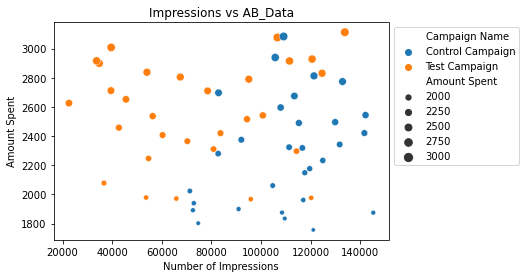

In [34]:
sns.scatterplot(x='Number of Impressions', y='Amount Spent',hue='Campaign Name', size='Amount Spent' ,data=ab_data)


plt.xlabel('Number of Impressions')
plt.ylabel('Amount Spent')
plt.title('Impressions vs AB_Data')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [35]:
import matplotlib.pyplot as plt 

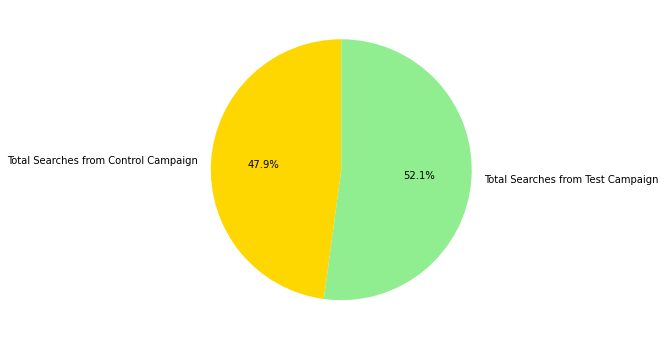

In [36]:
label = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]), 
          sum(test_data["Searches Received"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(counts,labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Control VS test: searches ")

plt.show()

In [37]:
#so here test campaign resulted in more searches on the website 

In [38]:
#we'll look at the number of website click from both campaigns 

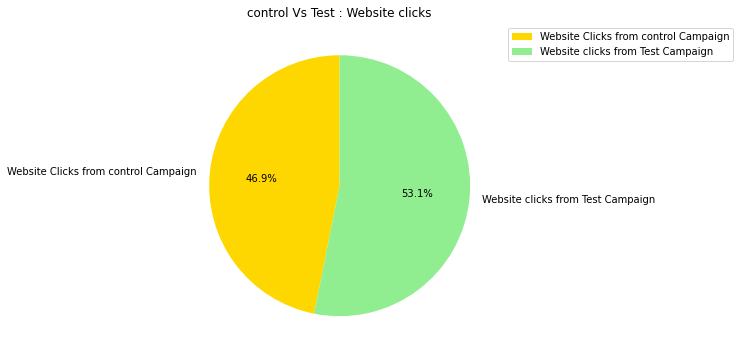

In [45]:
label = ["Website Clicks from control Campaign",
        "Website clicks from Test Campaign"]
counts = [sum(control_data['Website Clicks']),
         sum(test_data['Website Clicks'])]
colors = ['gold','lightgreen']

plt.figure(figsize=(6, 6))
plt.pie(counts,labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("control Vs Test : Website clicks")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [40]:
#here test campaign wins in the number of website clicks

In [41]:
#lets see amount of content viewed after reaching the website from both campaigns 

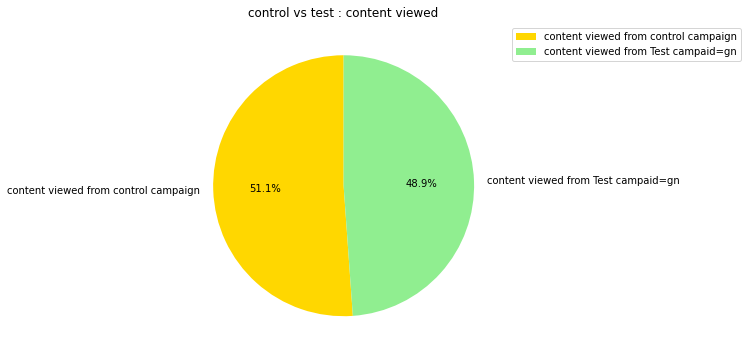

In [44]:
label = ["content viewed from control campaign",
        "content viewed from Test campaid=gn"]
counts = [sum(control_data['Content Viewed']),
         sum(test_data['Content Viewed'])]
colors = ['gold','lightgreen']

plt.figure(figsize=(6,6))
plt.pie(counts,labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("control vs test : content viewed")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [46]:
#here audience of the control campaign viewed more content than test campaign

In [47]:
#let’s have a look at the number of products added to the cart from both campaigns:

Text(0.5, 1.0, 'control vs test : Added to cart')

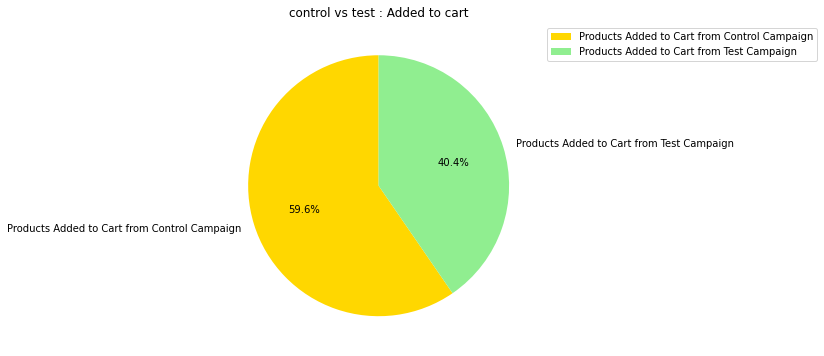

In [53]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(6,6))
plt.pie(counts,labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title("control vs test : Added to cart")

In [49]:
#Despite low website clicks more products were added to the cart from the control campaign.

In [50]:
#let’s have a look at the amount spent on both campaigns:

Text(0.5, 1.0, 'control vs test : Amount spent ')

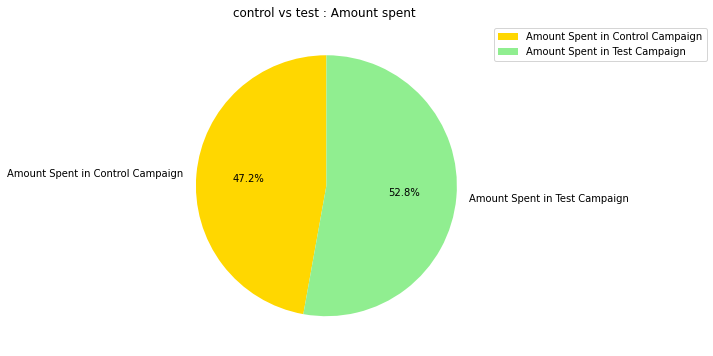

In [55]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(6,6))
plt.pie(counts,labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title("control vs test : Amount spent ")

In [56]:
#The amount spent on the test campaign is higher than the control campaign. 
#But as we can see that the control campaign resulted in more content views and more products in the cart,
#the control campaign is more efficient than the test campaign

Text(0.5, 1.0, 'control vs test : Purchases Made')

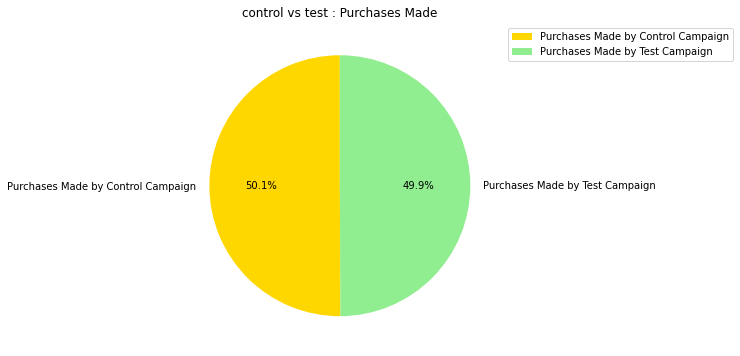

In [57]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['gold','lightgreen']

plt.figure(figsize=(6,6))
plt.pie(counts,labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title("control vs test : Purchases Made")

In [58]:
#there is only difference of around 1 % in the purchases made from both ad

In [59]:
#to find which ad campaign converts more. 
#I will first look at the relationship between the number of website clicks and content viewed from both campaigns:

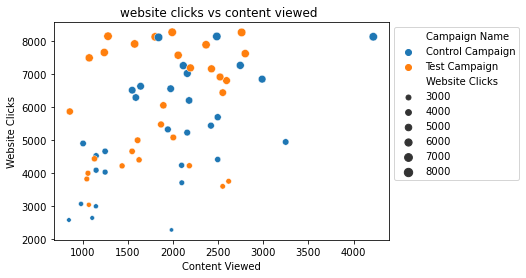

In [62]:
sns.scatterplot(x='Content Viewed', y='Website Clicks',hue='Campaign Name', size='Website Clicks' ,data=ab_data)


plt.xlabel('Content Viewed')
plt.ylabel('Website Clicks')
plt.title('website clicks vs content viewed ')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [64]:
#here the website click of test campaign higher but enagagement from control campaign is higher 
#so control campaign wins!

In [65]:
#relationship between the amount of content viewed and the number of products added to the cart from both campaigns

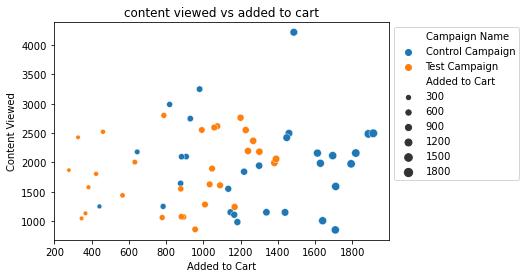

In [67]:
sns.scatterplot(x='Added to Cart', y='Content Viewed',hue='Campaign Name', size='Added to Cart' ,data=ab_data)


plt.ylabel('Content Viewed')
plt.xlabel('Added to Cart')
plt.title('content viewed vs added to cart')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [68]:
#the control campaign wins!

In [69]:
#et’s have a look at the relationship between the number of products added to the cart and the number of sales from both campaigns

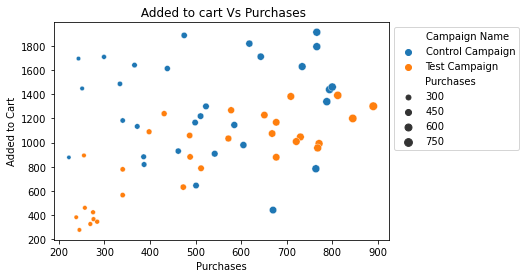

In [70]:
sns.scatterplot(x='Purchases', y='Added to Cart',hue='Campaign Name', size='Purchases' ,data=ab_data)


plt.xlabel('Purchases')
plt.ylabel('Added to Cart')
plt.title(' Added to cart Vs Purchases')


plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [71]:
#Although the control campaign resulted in more sales and more products in the cart, the conversation rate of the test campaign is higher

# From the above A/B tests,
#we found that the control campaign resulted in more sales and engagement from the visitors.
#More products were viewed from the control campaign, resulting in more products in the cart and more sales.
#But the conversation rate of products in the cart is higher in the test campaign. 
#The test campaign resulted in more sales according to the products viewed and added to the cart. 
#And the control campaign results in more sales overall. So,
#the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.